In [1]:
import os
import sys
import cv2

parent_dir = os.path.dirname(os.getcwd())
parent_dir = os.path.dirname(parent_dir)
sys.path.append(parent_dir)

from calibration.intrinsics import IntrinsicsCalibrator
from calibration.utils import read_data

In [2]:
# Example usage
base_dir = '../../hand_in_eye'
rgb_list, depth_list, pose_list, rgb_intrinsics, rgb_coeffs, depth_intrinsics, depth_coeffs, depth_scale = read_data(base_dir)

aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
board = cv2.aruco.CharucoBoard((5, 5), 0.08, 0.06, aruco_dict)

calibrator = IntrinsicsCalibrator(aruco_dict, board)
ret, mtx, dist, rvecs, tvecs = calibrator.calibrate_camera(rgb_list, rgb_intrinsics)

print("Camera matrix : \n {0}".format(mtx))
print("Distortion Coefficients : \n {0}".format(dist))

POSE ESTIMATION STARTS:
Camera matrix : 
 [[1.25983322e+03 0.00000000e+00 9.60967884e+02]
 [0.00000000e+00 1.25779913e+03 5.50251892e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Coefficients : 
 [[1.06579906e+00]
 [1.65473596e+02]
 [1.16313727e-02]
 [5.88246331e-03]
 [6.13721304e+00]
 [1.12543848e+00]
 [1.64124824e+02]
 [5.00419527e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]]


# Visualize calibration results

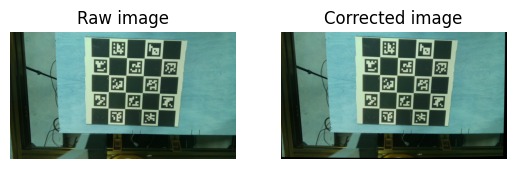

In [3]:
import matplotlib.pyplot as plt
plt.figure()
frame = rgb_list[0]
img_undist = cv2.undistort(frame,mtx,dist,None)
plt.subplot(1,2,1)
plt.imshow(frame)
plt.title("Raw image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_undist)
plt.title("Corrected image")
plt.axis("off")
plt.show()